##### Copyright 2023 Phillip Truppelli

In [2]:
# The purpose of this script is to showcase how natural language can be converted into quantum states for implementation in Qiskit.
# This will provide a baseline framework for query answering on a quantum computer.
# You may obtain the source code and documentation here:
# 
# https://github.com/truppelli
# 
# This code is covered under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Vocabulary:
Word('quantum', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('computers', grammar.pregroup.Ty(rigid.Ob('n')))
Word('and', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('algorithms', grammar.pregroup.Ty(rigid.Ob('n')))


Diagram for 'quantum computers and algorithms':


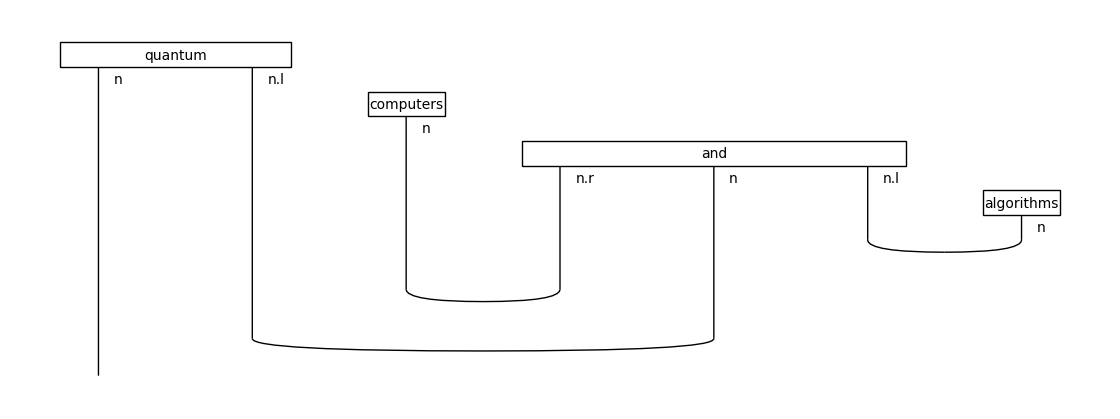

In [4]:
# DisCoCat (Categorical Compositional Distributional) is a mathematical foundation that can be used to represent grammatical structure.
# Starting from the first example seen in the approach section of the corresponding paper
from discopy.grammar.pregroup import Ty, Id, Word, Cup, Diagram

n, s = Ty('n'), Ty('s')

quantum = Word("quantum", n @ n.l)
computers = Word("computers", n)
_and = Word("and", (n.r @ n) @ n.l)
algorithms = Word("algorithms", n)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [quantum, computers, _and, algorithms]))))
print("\n")
from pytket.circuit.display import render_circuit_jupyter
from lambeq import AtomicType, BobcatParser, IQPAnsatz

N = AtomicType.NOUN
S = AtomicType.SENTENCE

parser = BobcatParser()
print("Diagram for 'quantum computers and algorithms':")
diagram = parser.sentence2diagram('quantum computers and algorithms')
diagram.draw(figsize=(11, 4))

Vocabulary:
Word('Phillip', grammar.pregroup.Ty(rigid.Ob('n')))
Word('designs', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('s'), rigid.Ob('n', z=-1)))
Word('efficient', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('quantum', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('algorithms', grammar.pregroup.Ty(rigid.Ob('n')))


Diagram for 'Phillip designs efficient quantum algorithms':


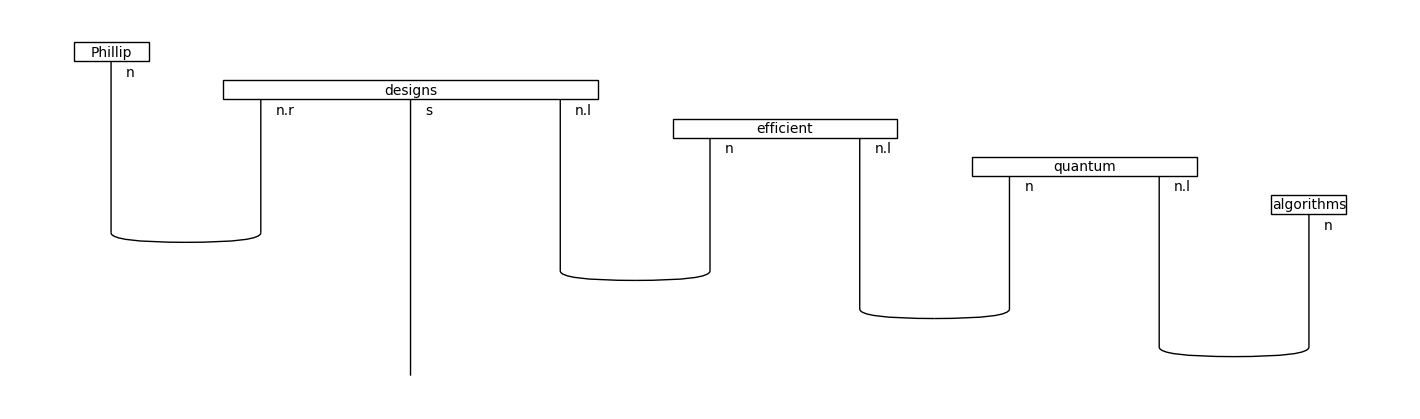

In [7]:
# DisCoCat (Categorical Compositional Distributional) is a mathematical foundation that can be used to represent grammatical structure.
# The following example showcases a sentence with a proper noun, a verb, and two adjectives that describe a single object.
from discopy.grammar.pregroup import Ty, Id, Word, Cup, Diagram

n, s = Ty('n'), Ty('s')

Phillip = Word("Phillip", n)
designs = Word("designs", n.r @ s @ n.l)
efficient = Word("efficient", n @ n.l)
quantum = Word("quantum", n @ n.l)
algorithms = Word("algorithms", n)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [Phillip, designs, efficient, quantum, algorithms]))))

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n) @ Cup(n.l, n) @ Cup(n.l, n)

sentence = Phillip @ designs @ efficient @ quantum @ algorithms >> grammar
print("\n")
print("Diagram for 'Phillip designs efficient quantum algorithms':")
sentence.draw(figsize=(14, 4))

In [8]:
# Now we want to test out the parsing capabilities of DisCoPy
parsing = {"{} {} {} {} {}.".format(subj, verb, adj1, adj2, obj): subj @ verb @ adj1 @ adj2 @ obj >> grammar
            for subj in [Phillip] for verb in [designs] for adj1 in [efficient] for adj2 in [quantum] for obj in [algorithms]}
diagram = parsing['Phillip designs efficient quantum algorithms.']
sentences = list(parsing.keys())
print("Grammatical sentences:\n{}".format('\n'.join(sentences)))

Grammatical sentences:
Phillip designs efficient quantum algorithms.


In [9]:
# Next, we will create another example with a different sentence structure.
# If we rearrange the above sentence and make the adjective efficient apply to Phillip instead of algorithms, while reducing the total adjectives to just efficient, we can write:
# "Phillip who designs algorithms is efficient."
from discopy.grammar.pregroup import Ty, Id, Word, Cup, Diagram

n, s = Ty('n'), Ty('s')

Phillip = Word("Phillip", n)
who = Word("who", n.r @ n @ s.l @ n)
designs = Word("designs", n.r @ s @ n.l)
algorithms = Word("algorithms", n)
is_efficient = Word("is efficient", n.r @ s)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [Phillip, who, designs, algorithms, is_efficient]))))

vocab = [Phillip, who, designs, algorithms, is_efficient]

Vocabulary:
Word('Phillip', grammar.pregroup.Ty(rigid.Ob('n')))
Word('who', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('n'), rigid.Ob('s', z=-1), rigid.Ob('n')))
Word('designs', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('s'), rigid.Ob('n', z=-1)))
Word('algorithms', grammar.pregroup.Ty(rigid.Ob('n')))
Word('is efficient', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('s')))


In [10]:
from time import time
from discopy.grammar.pregroup import brute_force

gen, n_sentences = brute_force(*vocab), 10
sentences, parsing = list(), dict()

print("Brute force search for grammatical sentences:")

start = time()
for i in range(n_sentences):
    diagram = next(gen)
    sentence = ' '.join(str(w)
        for w in diagram.boxes if isinstance(w, Word)) + '.'
    sentences.append(sentence)
    parsing.update({sentence: diagram})
    print(sentence)

print("\n{:.2f} seconds to generate {} sentences.".format(time() - start, n_sentences))

Brute force search for grammatical sentences:
Phillip is efficient.
algorithms is efficient.
Phillip designs Phillip.
Phillip designs algorithms.
algorithms designs Phillip.
algorithms designs algorithms.
Phillip who is efficient is efficient.
algorithms who is efficient is efficient.
Phillip who designs Phillip is efficient.
Phillip who designs algorithms is efficient.

2.60 seconds to generate 10 sentences.


Diagram for 'Phillip who designs algorithms is efficient.':


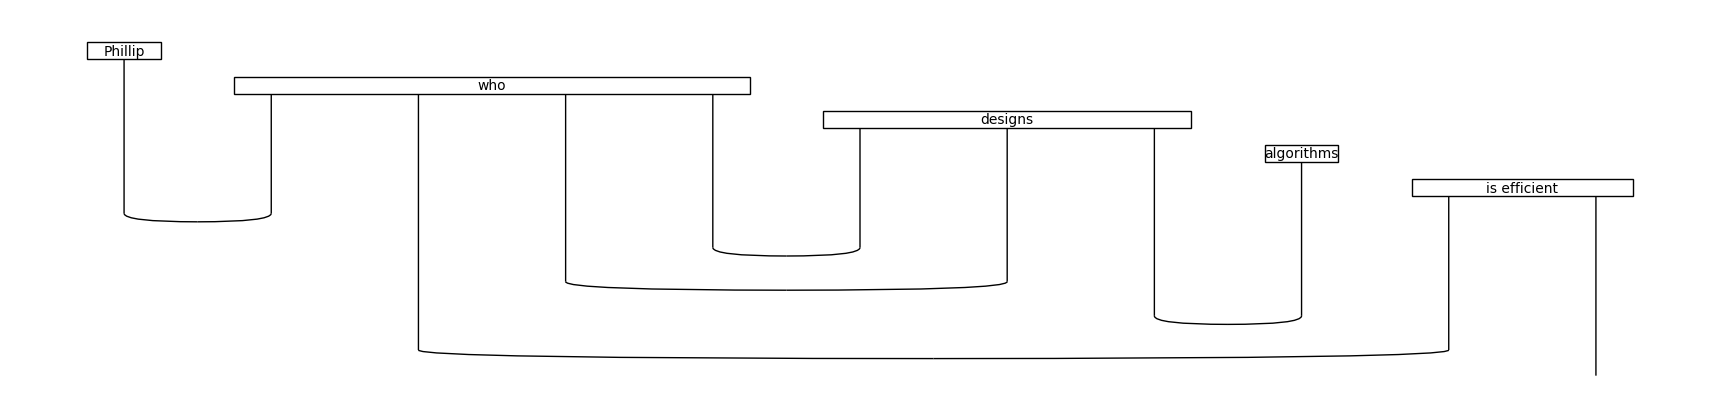

In [11]:
from discopy.drawing import draw
print("Diagram for 'Phillip who designs algorithms is efficient.':")
draw(parsing['Phillip who designs algorithms is efficient.'], draw_type_labels=False, figsize=(17, 4))

Circuit for the intransitive state where phase = π, used as ansatz for "Phillip" and "algorithms":


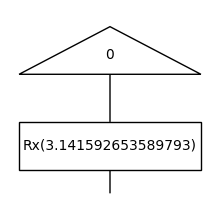

Circuit for the transitive state where phase = π, used as ansatz for "designs":


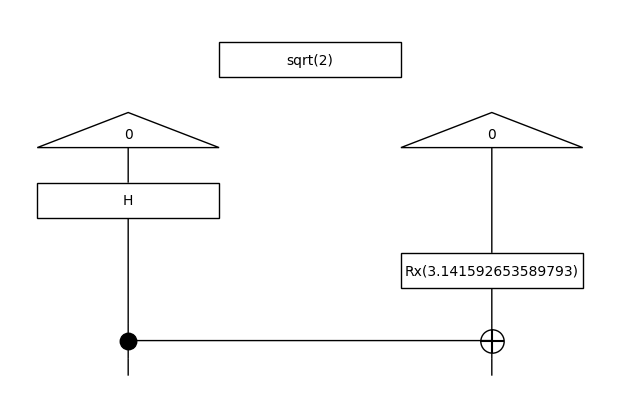

Circuit for the GHZ state, used as ansatz for "who":


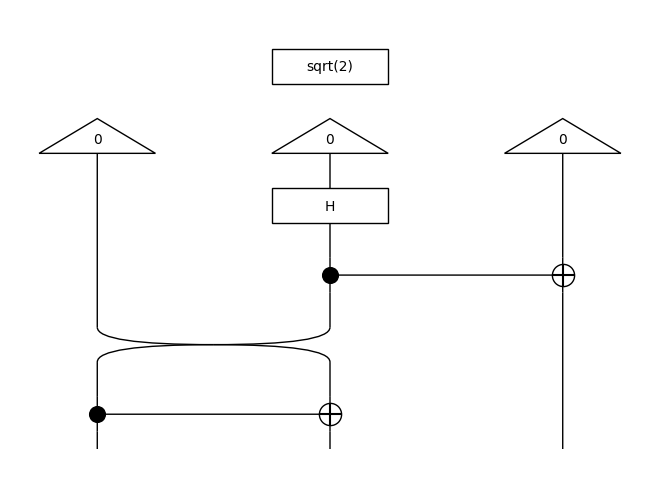

In [12]:
from discopy.quantum import Circuit, sqrt, Ket, H, Rx, CX, SWAP
import math, unicodedata

# Ansatz for words with type `n`, e.g. 'Phillip', 'algorithms'
def intransitive_ansatz(phase):
    return Ket(0) >> Rx(phase)

# Ansatz for words with type `n.r @ s @ n.l`, e.g. 'designs'
def transitive_ansatz(phase):
    return sqrt(2) @ Ket(0, 0) >> H @ Rx(phase) >> CX

def who_ansatz():
    return sqrt(2) @ Ket(0, 0, 0)\
    >> Circuit.id(1) @ H @ Circuit.id(1)\
    >> Circuit.id(1) @ CX\
    >> (SWAP >>  CX) @ Circuit.id(1)

print("Circuit for the intransitive state where phase = " + unicodedata.lookup("GREEK SMALL LETTER PI") + ", used as ansatz for \"Phillip\" and \"algorithms\":")
intransitive_ansatz(math.pi).draw(aspect='auto', draw_type_labels=False, figsize=(2, 2))

print("Circuit for the transitive state where phase = " + unicodedata.lookup("GREEK SMALL LETTER PI") + ", used as ansatz for \"designs\":")
transitive_ansatz(math.pi).draw(aspect='auto', draw_type_labels=False, figsize=(6, 4))

print("Circuit for the GHZ state, used as ansatz for \"who\":")
who_ansatz().draw(aspect='auto', draw_type_labels=False)

In [27]:
import numpy as np
from pytket.circuit.display import render_circuit_jupyter
from discopy.quantum import qubit, Ket, CircuitFunctor, circuit, CX, H, Rx, sqrt
from discopy.quantum.circuit import Functor, Id
from lambeq import AtomicType, BobcatParser

ob = {s: qubit ** 0, n: qubit ** 1}
ar = lambda params: {
    Phillip: Ket(0),
    who: who_ansatz(),
    designs: transitive_ansatz(params['designs']),
    algorithms: Ket(1),
    is_efficient: intransitive_ansatz(params['is_efficient'])}

params = {'designs': 0.5, 'is_efficient': 1.0}

print("Phillip:")
print(Ket(0).eval())
print("who:")
print(who_ansatz().eval())
print("designs:")
print(transitive_ansatz(params['designs']).eval())
print("algorithms:")
print(Ket(1).eval())
print("is_efficient:")
print(intransitive_ansatz(params['is_efficient']).eval())

Phillip:
Tensor[complex]([1.+0.j, 0.+0.j], dom=Dim(1), cod=Dim(2))
who:
Tensor[complex]([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], dom=Dim(1), cod=Dim(2, 2, 2))
designs:
Tensor[complex]([6.123234e-17+0.j, 0.000000e+00-1.j, 0.000000e+00-1.j, 6.123234e-17+0.j], dom=Dim(1), cod=Dim(2, 2))
algorithms:
Tensor[complex]([0.+0.j, 1.+0.j], dom=Dim(1), cod=Dim(2))
is_efficient:
Tensor[complex]([-1.+0.0000000e+00j, 0.-1.2246468e-16j], dom=Dim(1), cod=Dim(2))


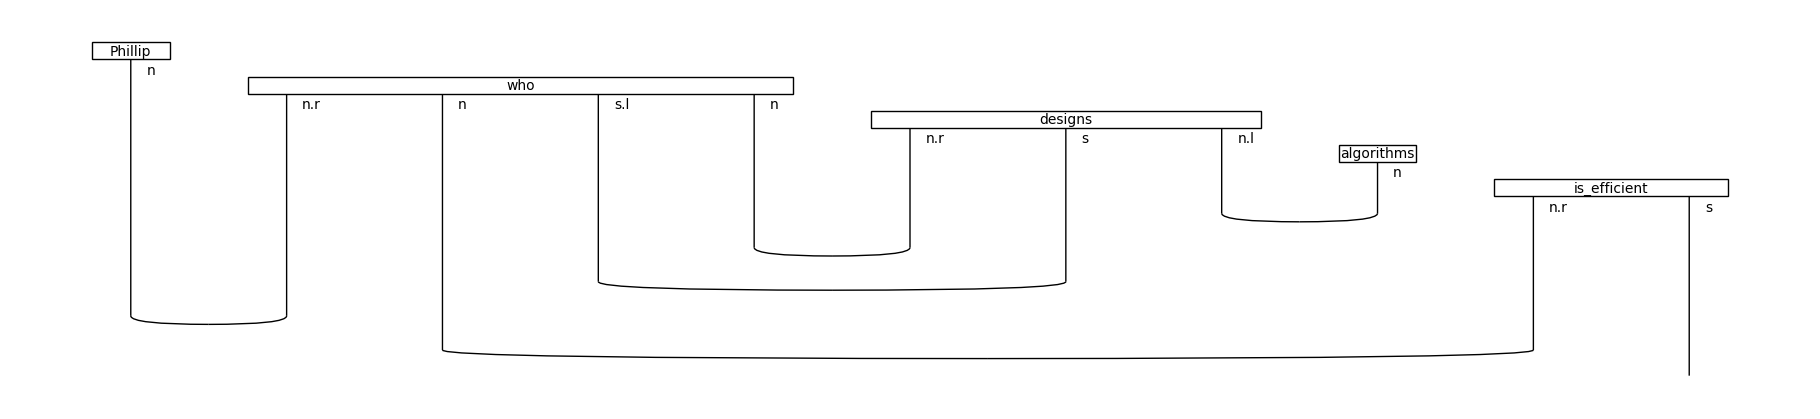

In [14]:
from pytket.circuit.display import render_circuit_jupyter
from lambeq import AtomicType, BobcatParser, IQPAnsatz

# Now we will utilize the Lambeq project functionality

N = AtomicType.NOUN
S = AtomicType.SENTENCE

parser = BobcatParser()
diagram = parser.sentence2diagram('Phillip who designs algorithms is_efficient')
diagram.draw(figsize=(18, 4))

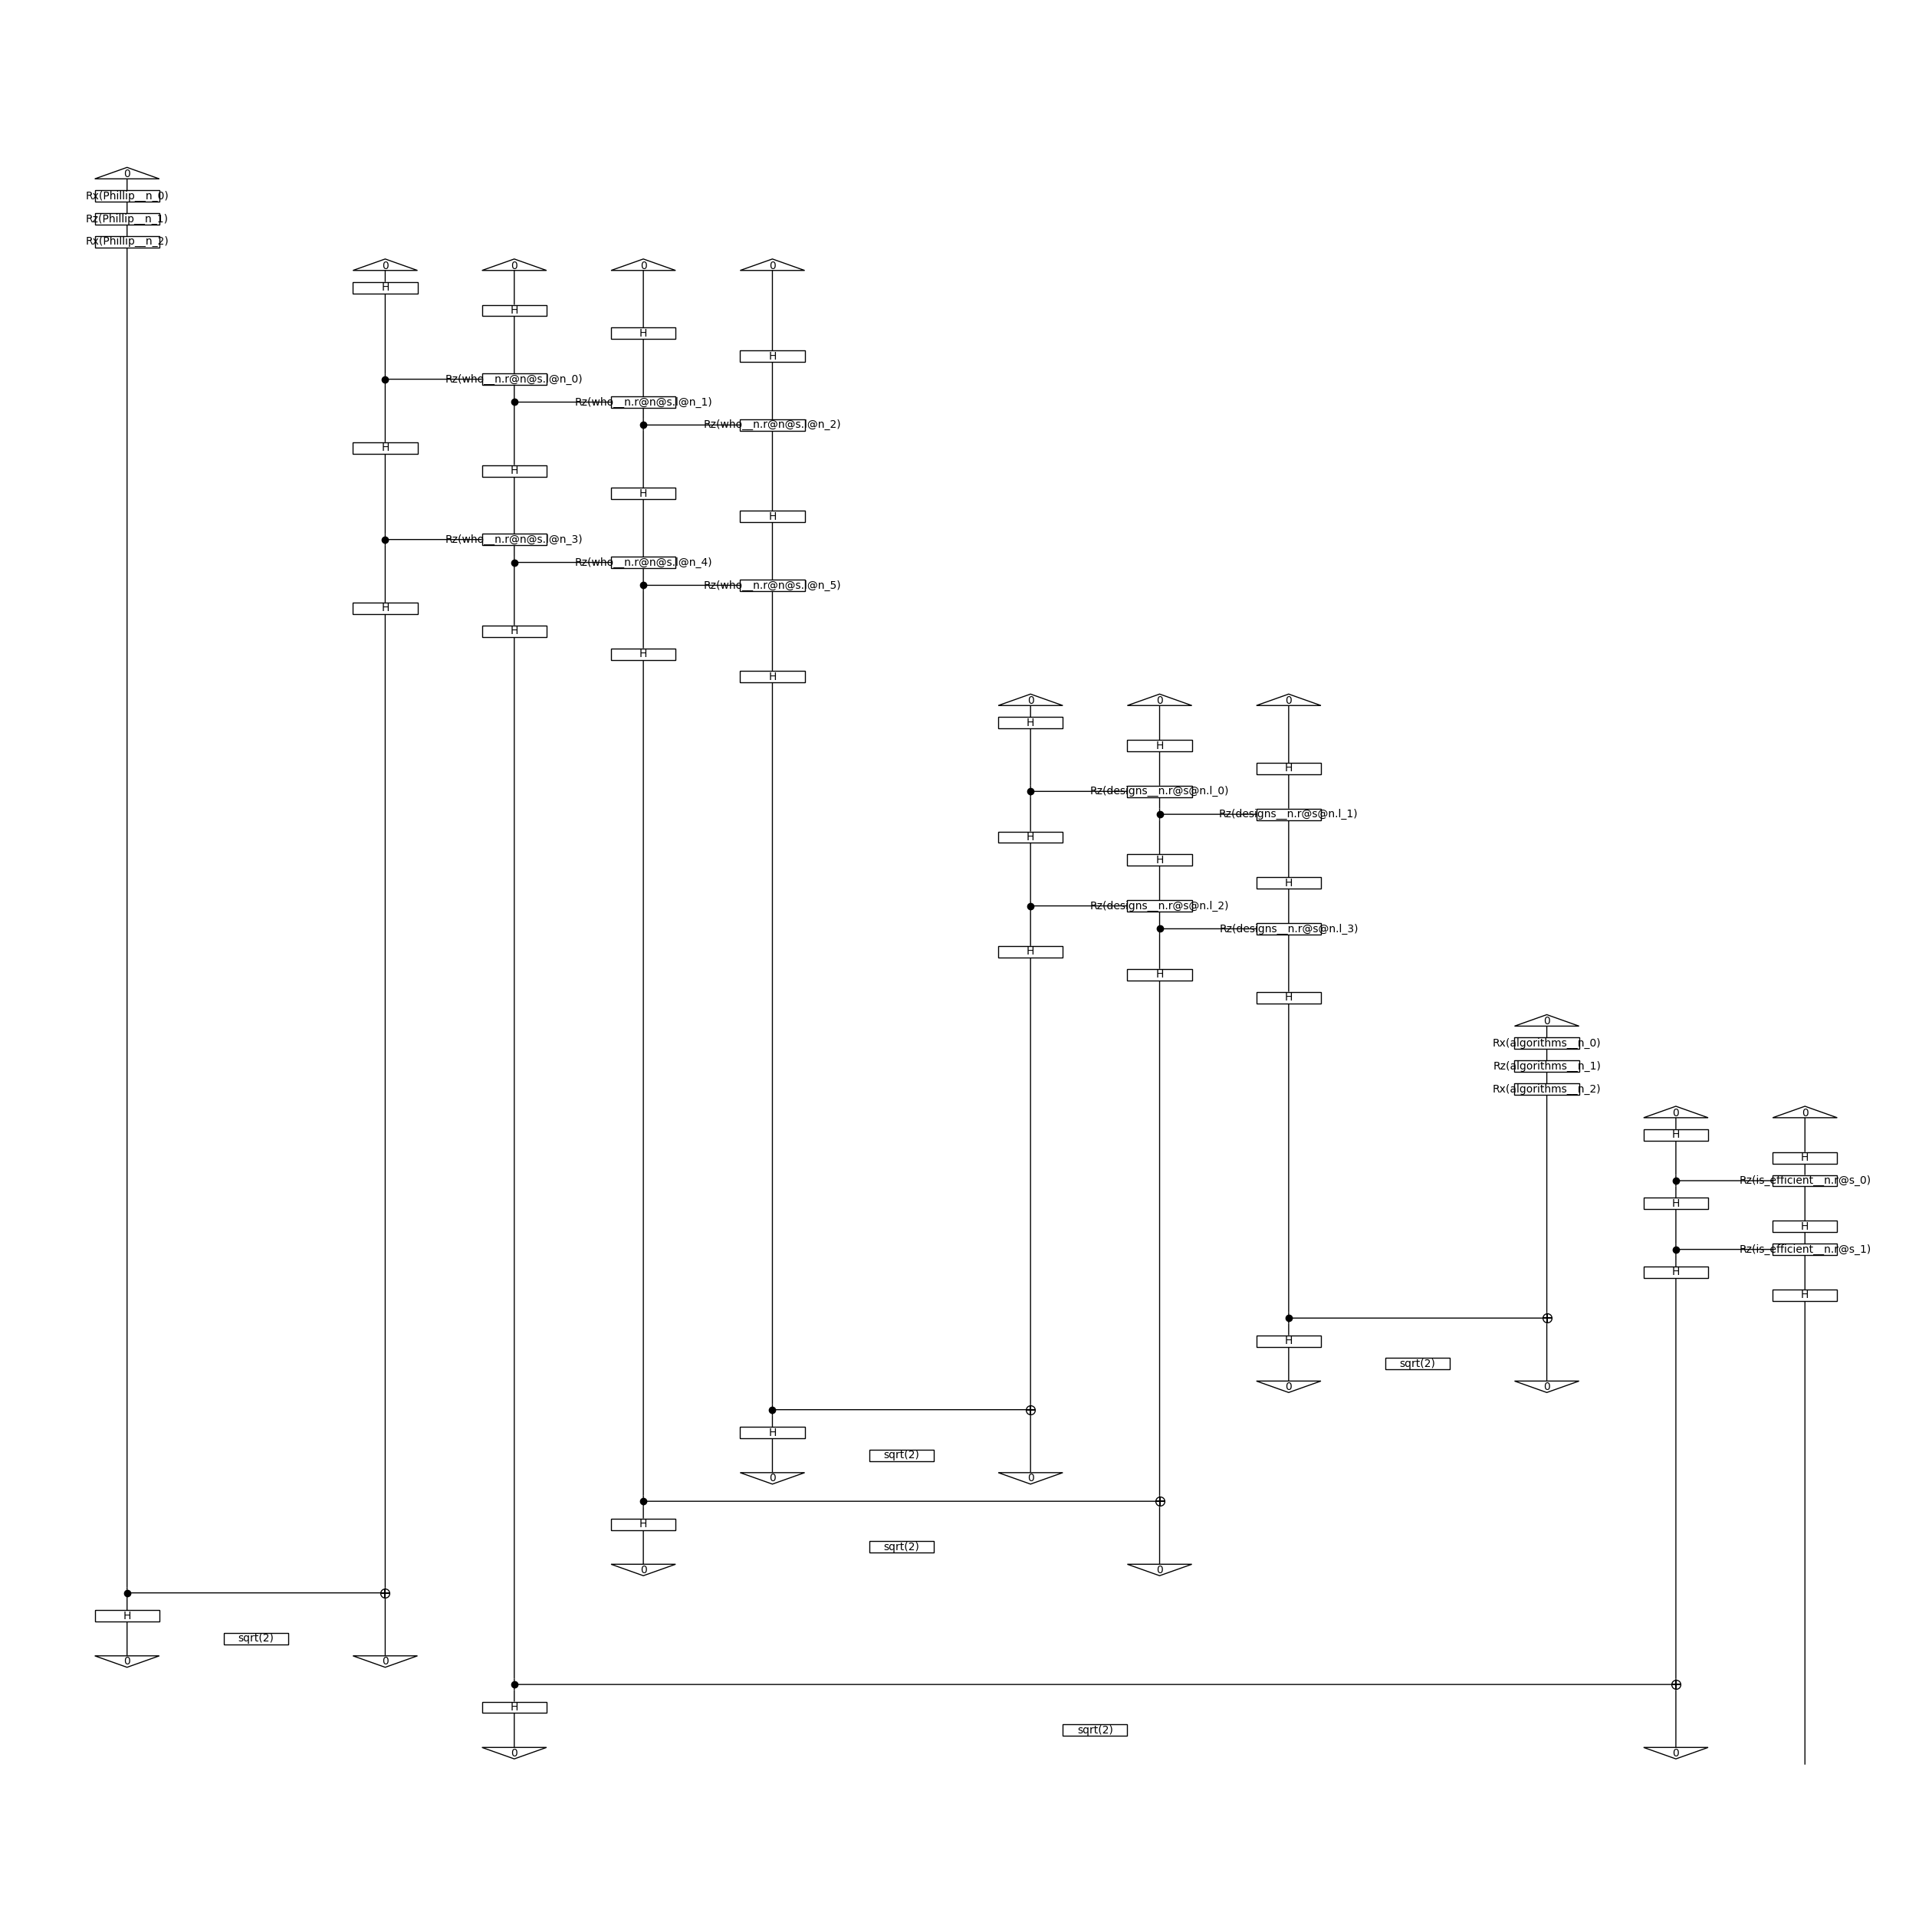

In [15]:
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(25, 25))

In [16]:
tket_circuit = ansatz(diagram).to_tk()

render_circuit_jupyter(tket_circuit)

In [17]:
from sympy import default_sort_key

# Make sure you sort your symbols as they are returned as a set.
parameters = sorted(tket_circuit.free_symbols(), key=default_sort_key)

param_dict = {p: i * 0.001 for i, p in enumerate(parameters)}
param_dict

{Phillip__n_0: 0.0,
 Phillip__n_1: 0.001,
 Phillip__n_2: 0.002,
 algorithms__n_0: 0.003,
 algorithms__n_1: 0.004,
 algorithms__n_2: 0.005,
 designs__n.r@s@n.l_0: 0.006,
 designs__n.r@s@n.l_1: 0.007,
 designs__n.r@s@n.l_2: 0.008,
 designs__n.r@s@n.l_3: 0.009000000000000001,
 is_efficient__n.r@s_0: 0.01,
 is_efficient__n.r@s_1: 0.011,
 who__n.r@n@s.l@n_0: 0.012,
 who__n.r@n@s.l@n_1: 0.013000000000000001,
 who__n.r@n@s.l@n_2: 0.014,
 who__n.r@n@s.l@n_3: 0.015,
 who__n.r@n@s.l@n_4: 0.016,
 who__n.r@n@s.l@n_5: 0.017}

In [18]:
tket_circuit.symbol_substitution(param_dict)

# Render circuit with new values

render_circuit_jupyter(tket_circuit)

In [19]:
from pytket.extensions.qiskit import tk_to_qiskit

print("{}:\n{}\n".format(tket_circuit, '\n'.join(map(str, tket_circuit))))
print("post selection:\n{}\n".format(tket_circuit.post_selection))
print("scalar:\n{}\n".format(tket_circuit.scalar))
print("qiskit circuit:")
tk_to_qiskit(tket_circuit).draw()

<tket::Circuit, qubits=11, gates=65>:
Rx(0) q[0];
H q[1];
H q[2];
H q[3];
H q[4];
H q[5];
H q[6];
H q[7];
Rx(0.006) q[8];
H q[9];
H q[10];
Rz(0.002) q[0];
CRz(0.024) q[1], q[2];
CRz(0.012) q[5], q[6];
Rz(0.008) q[8];
CRz(0.02) q[9], q[10];
Rx(0.004) q[0];
H q[1];
CRz(0.026) q[2], q[3];
H q[5];
CRz(0.014) q[6], q[7];
Rx(0.01) q[8];
H q[9];
H q[10];
H q[2];
CRz(0.028) q[3], q[4];
H q[6];
H q[7];
CRz(0.022) q[9], q[10];
CRz(0.03) q[1], q[2];
H q[3];
H q[4];
CRz(0.016) q[5], q[6];
H q[9];
H q[10];
H q[1];
CRz(0.032) q[2], q[3];
H q[5];
CRz(0.018) q[6], q[7];
CX q[0], q[1];
H q[2];
CRz(0.034) q[3], q[4];
H q[6];
H q[7];
Measure q[1] --> c[7];
H q[0];
CX q[2], q[9];
H q[3];
H q[4];
CX q[7], q[8];
Measure q[8] --> c[1];
Measure q[0] --> c[6];
Measure q[9] --> c[9];
H q[2];
CX q[3], q[6];
CX q[4], q[5];
H q[7];
Measure q[7] --> c[0];
Measure q[5] --> c[3];
Measure q[6] --> c[5];
Measure q[2] --> c[8];
H q[3];
H q[4];
Measure q[4] --> c[2];
Measure q[3] --> c[4];

post selection:
{0: 0, 1: 0, 2

┌───────┐    ┌───────────┐   ┌───────────┐                  »
 q_0: ───┤ Rx(0) ├────┤ Rz(π/500) ├───┤ Rx(π/250) ├──────────────────»
         └─┬───┬─┘    └───────────┘   └───┬───┬───┘                  »
 q_1: ─────┤ H ├────────────■─────────────┤ H ├──────────────────────»
           ├───┤     ┌──────┴───────┐     └───┘           ┌───┐      »
 q_2: ─────┤ H ├─────┤ Rz(0.075398) ├───────■─────────────┤ H ├──────»
           ├───┤     └──────────────┘┌──────┴───────┐     └───┘      »
 q_3: ─────┤ H ├─────────────────────┤ Rz(0.081681) ├───────■────────»
           ├───┤                     └──────────────┘┌──────┴───────┐»
 q_4: ─────┤ H ├─────────────────────────────────────┤ Rz(0.087965) ├»
           ├───┤                          ┌───┐      └──────────────┘»
 q_5: ─────┤ H ├────────────■─────────────┤ H ├──────────────────────»
           ├───┤     ┌──────┴───────┐     └───┘           ┌───┐      »
 q_6: ─────┤ H ├─────┤ Rz(0.037699) ├───────■─────────────┤ H ├──────»
           ├───┤     └──────────────┘┌──────┴───────┐     ├───┤      »
 q_7: ─────┤ H ├─────────────────────┤ Rz(0.043982) ├─────┤ H ├──────»
      ┌────┴───┴────┐ ┌───────────┐  └┬───────────┬─┘     └───┘      »
 q_8: ┤ Rx(0.01885) ├─┤ Rz(π/125) ├───┤ Rx(π/100) ├──────────────────»
      └────┬───┬────┘ └───────────┘   └───┬───┬───┘                  »
 q_9: ─────┤ H ├────────────■─────────────┤ H ├─────────────■────────»
           ├───┤       ┌────┴─────┐       ├───┤      ┌──────┴───────┐»
q_10: ─────┤ H ├───────┤ Rz(π/50) ├───────┤ H ├──────┤ Rz(0.069115) ├»
           └───┘       └──────────┘       └───┘      └──────────────┘»
c: 10/═══════════════════════════════════════════════════════════════»
                                                                     »
«                                                     ┌───┐               ┌─┐»
« q_0: ───────────────────────────────────────■───────┤ H ├───────────────┤M├»
«                           ┌───┐           ┌─┴─┐     └┬─┬┘               └╥┘»
« q_1: ───────■─────────────┤ H ├───────────┤ X ├──────┤M├─────────────────╫─»
«      ┌──────┴───────┐     └───┘           ├───┤      └╥┘      ┌───┐      ║ »
« q_2: ┤ Rz(0.094248) ├───────■─────────────┤ H ├───────╫────■──┤ H ├──────╫─»
«      └────┬───┬─────┘┌──────┴──────┐      └───┘       ║    │  ├───┤      ║ »
« q_3: ─────┤ H ├──────┤ Rz(0.10053) ├────────■─────────╫────┼──┤ H ├──■───╫─»
«           ├───┤      └─────────────┘ ┌──────┴──────┐  ║    │  ├───┤  │   ║ »
« q_4: ─────┤ H ├──────────────────────┤ Rz(0.10681) ├──╫────┼──┤ H ├──┼───╫─»
«           └───┘           ┌───┐      └─────────────┘  ║    │  └───┘  │   ║ »
« q_5: ───────■─────────────┤ H ├───────────────────────╫────┼─────────┼───╫─»
«      ┌──────┴───────┐     └───┘           ┌───┐       ║    │       ┌─┴─┐ ║ »
« q_6: ┤ Rz(0.050265) ├───────■─────────────┤ H ├───────╫────┼───────┤ X ├─╫─»
«      └──────────────┘┌──────┴───────┐     ├───┤       ║    │       ├───┤ ║ »
« q_7: ────────────────┤ Rz(0.056549) ├─────┤ H ├───────╫────┼────■──┤ H ├─╫─»
«                      └──────────────┘     └───┘       ║    │  ┌─┴─┐└┬─┬┘ ║ »
« q_8: ─────────────────────────────────────────────────╫────┼──┤ X ├─┤M├──╫─»
«           ┌───┐                                       ║  ┌─┴─┐└┬─┬┘ └╥┘  ║ »
« q_9: ─────┤ H ├───────────────────────────────────────╫──┤ X ├─┤M├───╫───╫─»
«           ├───┤                                       ║  └───┘ └╥┘   ║   ║ »
«q_10: ─────┤ H ├───────────────────────────────────────╫─────────╫────╫───╫─»
«           └───┘                                       ║         ║    ║   ║ »
«c: 10/═════════════════════════════════════════════════╩═════════╩════╩═══╩═»
«                                                       7         9    1   6 »
«                            
« q_0: ──────────────────────
«                            
« q_1: ──────────────────────
«                   ┌─┐      
« q_2: ─────────────┤M├──────
«      ┌───┐        └╥┘   ┌─┐
« q_3: ┤ H ├─────────╫────┤M├
«      └───┘┌───┐  

In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector, Statevector

print('qiskit vers.= %s'%qiskit.__version__)

shots = 1024
simulator = Aer.get_backend('qasm_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

qr = QuantumRegister(11, name="q_reg")
cr = ClassicalRegister(10, name="c_reg")
qc = QuantumCircuit(qr, cr)


nlp_circuit = QuantumCircuit(qr, cr)

# These are the circuit operations for the transformed phrase "Phillip who designs algorithms is efficient"
# This circuit is constructed without Lambeq scaling for simplicity

qc.rx(0, qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.h(qr[4])
qc.h(qr[5])
qc.h(qr[6])
qc.h(qr[7])
qc.rx(0.006, qr[8])
qc.h(qr[9])
qc.h(qr[10])
qc.rz(0.002, qr[0])
qc.crz(0.024, qr[1], qr[2])
qc.crz(0.012, qr[5], qr[6])
qc.rz(0.008, qr[8])
qc.crz(0.02, qr[9], qr[10])
qc.rx(0.004, qr[0])
qc.h(qr[1])
qc.crz(0.026, qr[2], qr[3])
qc.h(qr[5])
qc.crz(0.014, qr[6], qr[7])
qc.rx(0.01, qr[8])
qc.h(qr[9])
qc.h(qr[10])
qc.h(qr[2])
qc.crz(0.028, qr[3], qr[4])
qc.h(qr[6])
qc.h(qr[7])
qc.crz(0.022, qr[9], qr[10])
qc.crz(0.03, qr[1], qr[2])
qc.h(qr[3])
qc.h(qr[4])
qc.crz(0.016, qr[5], qr[6])
qc.h(qr[9])
qc.h(qr[10])
qc.h(qr[1])
qc.crz(0.032, qr[2], qr[3])
qc.h(qr[5])
qc.crz(0.018, qr[6], qr[7])
qc.cx(qr[0], qr[1])
qc.h(qr[2])
qc.crz(0.034, qr[3], qr[4])
qc.h(qr[6])
qc.h(qr[7])

state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr[1], 7)
qc.h(qr[0])
qc.cx(qr[2], qr[9])
qc.h(qr[3])
qc.h(qr[4])
qc.cx(qr[7], qr[8])
qc.measure(qr[8], 1)
qc.measure(qr[0], 6)
qc.measure(qr[9], 9)
qc.h(qr[2])
qc.cx(qr[3], qr[6])
qc.cx(qr[4], qr[5])
qc.h(qr[7])
qc.measure(qr[7], 0)
qc.measure(qr[5], 3)
qc.measure(qr[6], 5)
qc.measure(qr[2], 8)
qc.h(qr[3])
qc.h(qr[4])
qc.measure(qr[4], 2)
qc.measure(qr[3], 4)

print('\nQUANTUM CIRCUIT DIAGRAM:')
qc.draw()

qiskit vers.= 0.45.1

STATEVECTOR:  Statevector([ 8.83621883e-02-4.41919294e-04j,
             -3.00440891e-06-1.76699161e-04j,
              8.83494629e-02-1.50220245e-03j, ...,
              6.22987785e-10-9.87497397e-09j,
              4.93748040e-06+3.11493477e-07j,
              5.04598814e-10-9.88541677e-09j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

QUANTUM CIRCUIT DIAGRAM:


┌───────┐  ┌───────────┐┌───────────┐                          »
 q_reg_0: ──┤ Rx(0) ├──┤ Rz(0.002) ├┤ Rx(0.004) ├──────────────────────────»
            └─┬───┬─┘  └───────────┘└───┬───┬───┘                          »
 q_reg_1: ────┤ H ├──────────■──────────┤ H ├───────────────────────■──────»
              ├───┤    ┌─────┴─────┐    └───┘        ┌───┐     ┌────┴─────┐»
 q_reg_2: ────┤ H ├────┤ Rz(0.024) ├──────■──────────┤ H ├─────┤ Rz(0.03) ├»
              ├───┤    └───────────┘┌─────┴─────┐    └───┘     └──┬───┬───┘»
 q_reg_3: ────┤ H ├─────────────────┤ Rz(0.026) ├──────■──────────┤ H ├────»
              ├───┤                 └───────────┘┌─────┴─────┐    ├───┤    »
 q_reg_4: ────┤ H ├──────────────────────────────┤ Rz(0.028) ├────┤ H ├────»
              ├───┤                     ┌───┐    └───────────┘    └───┘    »
 q_reg_5: ────┤ H ├──────────■──────────┤ H ├───────────────────────■──────»
              ├───┤    ┌─────┴─────┐    └───┘        ┌───┐    ┌─────┴─────┐»
 q_reg_6: ────┤ H ├────┤ Rz(0.012) ├──────■──────────┤ H ├────┤ Rz(0.016) ├»
              ├───┤    └───────────┘┌─────┴─────┐    ├───┤    └───────────┘»
 q_reg_7: ────┤ H ├─────────────────┤ Rz(0.014) ├────┤ H ├─────────────────»
          ┌───┴───┴───┐┌───────────┐└┬──────────┤    └───┘                 »
 q_reg_8: ┤ Rx(0.006) ├┤ Rz(0.008) ├─┤ Rx(0.01) ├──────────────────────────»
          └───┬───┬───┘└───────────┘ └──┬───┬───┘                 ┌───┐    »
 q_reg_9: ────┤ H ├──────────■──────────┤ H ├──────────■──────────┤ H ├────»
              ├───┤     ┌────┴─────┐    ├───┤    ┌─────┴─────┐    ├───┤    »
q_reg_10: ────┤ H ├─────┤ Rz(0.02) ├────┤ H ├────┤ Rz(0.022) ├────┤ H ├────»
              └───┘     └──────────┘    └───┘    └───────────┘    └───┘    »
c_reg: 10/═════════════════════════════════════════════════════════════════»
                                                                           »
«                                    ┌───┐               ┌─┐                   »
« q_reg_0: ───────────────────■──────┤ H ├───────────────┤M├───────────────────»
«              ┌───┐        ┌─┴─┐    └┬─┬┘               └╥┘                   »
« q_reg_1: ────┤ H ├────────┤ X ├─────┤M├─────────────────╫────────────────────»
«              └───┘        ├───┤     └╥┘      ┌───┐      ║              ┌─┐   »
« q_reg_2: ──────■──────────┤ H ├──────╫────■──┤ H ├──────╫──────────────┤M├───»
«          ┌─────┴─────┐    └───┘      ║    │  ├───┤      ║ ┌───┐        └╥┘   »
« q_reg_3: ┤ Rz(0.032) ├──────■────────╫────┼──┤ H ├──■───╫─┤ H ├─────────╫────»
«          └───────────┘┌─────┴─────┐  ║    │  ├───┤  │   ║ └───┘┌───┐    ║ ┌─┐»
« q_reg_4: ─────────────┤ Rz(0.034) ├──╫────┼──┤ H ├──┼───╫───■──┤ H ├────╫─┤M├»
«              ┌───┐    └───────────┘  ║    │  └───┘  │   ║ ┌─┴─┐└┬─┬┘    ║ └╥┘»
« q_reg_5: ────┤ H ├───────────────────╫────┼─────────┼───╫─┤ X ├─┤M├─────╫──╫─»
«              └───┘        ┌───┐      ║    │       ┌─┴─┐ ║ └───┘ └╥┘ ┌─┐ ║  ║ »
« q_reg_6: ──────■──────────┤ H ├──────╫────┼───────┤ X ├─╫────────╫──┤M├─╫──╫─»
«          ┌─────┴─────┐    ├───┤      ║    │       ├───┤ ║  ┌─┐   ║  └╥┘ ║  ║ »
« q_reg_7: ┤ Rz(0.018) ├────┤ H ├──────╫────┼────■──┤ H ├─╫──┤M├───╫───╫──╫──╫─»
«          └───────────┘    └───┘      ║    │  ┌─┴─┐└┬─┬┘ ║  └╥┘   ║   ║  ║  ║ »
« q_reg_8: ────────────────────────────╫────┼──┤ X ├─┤M├──╫───╫────╫───╫──╫──╫─»
«                                      ║  ┌─┴─┐└┬─┬┘ └╥┘  ║   ║    ║   ║  ║  ║ »
« q_reg_9: ────────────────────────────╫──┤ X ├─┤M├───╫───╫───╫────╫───╫──╫──╫─»
«                                      ║  └───┘ └╥┘   ║   ║   ║    ║   ║  ║  ║ »
«q_reg_10: ────────────────────────────╫─────────╫────╫───╫───╫────╫───╫──╫──╫─»
«                                      ║         ║    ║   ║   ║    ║   ║  ║  ║ »
«c_reg: 10/════════════════════════════╩═════════╩════╩═══╩═══╩════╩═══╩══╩══╩═»
«                                      7         9    1   6   0    3   5  8  2 »
«             
« q_reg_0: ───
«             
« q_reg_1: ───
« 


SIMULATION RESULTS:
Simulation distribution 0: {'0011001000': 13, '1001001001': 14, '0001001010': 13, '0011000000': 11, '0011101011': 8, '0000101001': 13, '1000000011': 13, '0010000011': 7, '1011000010': 8, '0011001011': 6, '0011100000': 10, '1000101000': 10, '0010101001': 5, '0000000000': 9, '1001101011': 10, '0001100010': 12, '0000000011': 11, '0010100011': 10, '1010001010': 9, '0011101000': 7, '1011100000': 9, '1010100001': 7, '0011000011': 5, '0011101010': 8, '0001100001': 7, '1001101010': 12, '0010101011': 9, '0001001000': 10, '0000100010': 8, '1000001000': 10, '0011100011': 6, '0011001010': 7, '1001100011': 7, '1010000000': 8, '1000101011': 13, '1000101001': 10, '0001100011': 9, '0000100011': 8, '1000001001': 9, '1001001010': 4, '0011100010': 7, '1011000000': 8, '1001000000': 8, '1011001010': 8, '1000100000': 4, '0010000010': 6, '0010001001': 6, '1010001001': 10, '1000000000': 5, '0000101010': 12, '1011100010': 8, '1011100001': 8, '1000101010': 3, '0001101001': 6, '1000001010': 

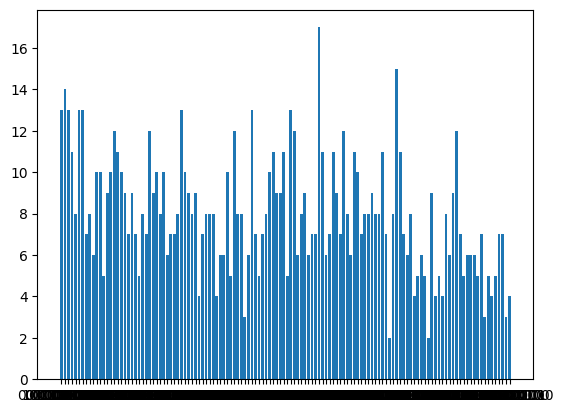

Simulation distribution 1: {'0010000000': 7, '1000100010': 9, '1000000000': 10, '1000101011': 8, '1010000000': 8, '1001000000': 10, '0011000001': 10, '0011100011': 10, '0011001010': 5, '0001000000': 9, '1000100001': 11, '0010000011': 8, '1001100001': 8, '0001101010': 9, '1010000001': 8, '0000001011': 14, '1000001000': 5, '0000100010': 10, '1000000001': 9, '1010000011': 6, '0010101010': 5, '1000000010': 3, '0000101000': 11, '1001000010': 11, '0001001011': 8, '1010100000': 13, '0010100000': 6, '0000001001': 6, '1010000010': 9, '0010001011': 10, '1010101001': 2, '1000000011': 9, '0000101001': 12, '0000100011': 11, '1000001001': 9, '0011100000': 6, '0011001011': 6, '0001000011': 10, '1011000010': 11, '0001100001': 14, '1001101010': 11, '0001100011': 4, '0001001000': 6, '1011001001': 8, '0011000000': 5, '0011101011': 9, '1001001010': 7, '0000100000': 12, '0010001000': 7, '0001100000': 9, '0011000010': 8, '1001000011': 11, '1000101001': 6, '1001101001': 11, '1011100000': 7, '1010100010': 7, 

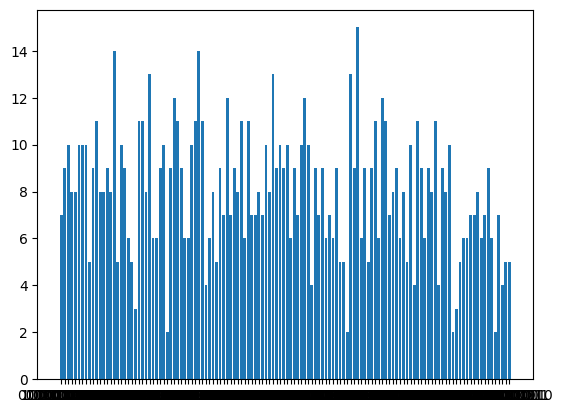

Simulation distribution 2: {'0011100011': 8, '0011001010': 11, '1011000001': 6, '0001100010': 12, '1000001010': 9, '0000101011': 8, '0000000010': 5, '1011000000': 7, '0001000001': 8, '0011100010': 15, '0011000000': 8, '0011101011': 11, '1001000001': 9, '0000101001': 4, '1000000011': 10, '1000101000': 13, '0010000010': 7, '1010001011': 9, '1001000010': 10, '0010101000': 8, '0000000001': 5, '0000101010': 9, '0000101000': 8, '1000000010': 4, '0010101010': 9, '0000100000': 11, '1011001001': 11, '0001001000': 8, '0011001001': 10, '1000100010': 10, '1011001011': 6, '0011000010': 9, '1001101000': 11, '1011100001': 8, '0001100011': 5, '0010001001': 11, '1011100000': 7, '1001101001': 7, '1011000010': 7, '0001000011': 13, '1010100000': 4, '1011101001': 7, '1001100000': 8, '0000100010': 9, '1000001000': 8, '0000001011': 8, '1001000000': 6, '0010000001': 12, '1011100010': 7, '1000101011': 8, '1010101001': 11, '0000001001': 8, '0010100000': 7, '1010001000': 9, '0001101011': 7, '1001100010': 12, '10

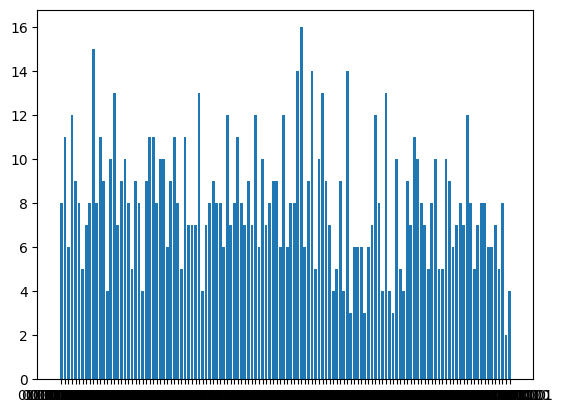

In [2]:
print('\nSIMULATION RESULTS:')
for i in range(0,3):
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    plt.bar(counts.keys(),counts.values())
    plt.show()